<a href="https://colab.research.google.com/github/zlximon/Tensorflow_DL/blob/master/CNN_and_computer_vision_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-05-13 07:38:37--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.125.128, 142.250.148.128, 108.177.112.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   120MB/s    in 0.9s    

2022-05-13 07:38:38 (120 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



#inspect the data

In [3]:
!ls pizza_steak 

test  train


In [4]:
import os 
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [5]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))#getting our class names 
print(class_names)

['pizza' 'steak']


In [6]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def random_img(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


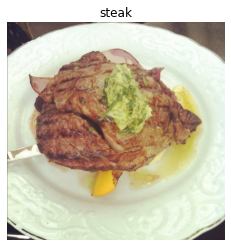

In [7]:
img=random_img(target_dir="pizza_steak/train/",target_class="steak")

In [8]:
tf.constant(img)   
img.shape# its return width ,height,color channels (RGB)


(512, 512, 3)

In [9]:
#first model 
import tensorflow as tf
from tensorflow.keras.preprocessing.image  import ImageDataGenerator
tf.random.set_seed(42)
#processing data 
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)
train_dir="/content/pizza_steak/train"
test_dir="pizza_steak/test"
train_data=train_datagen.flow_from_directory(directory=train_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)
valid_data=valid_datagen.flow_from_directory(directory=train_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


in this exmaple we divided our imges to batches that our model see images in batches

In [10]:
#creating model 
model1=tf.keras.Sequential([
tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
tf.keras.layers.Conv2D(10,3,activation="relu"),
tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
tf.keras.layers.Conv2D(10,3,activation="relu"),
tf.keras.layers.Conv2D(10,3,activation="relu"),
tf.keras.layers.MaxPool2D(2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense( 1,activation="sigmoid")
])
model1.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history1=model1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 29s 352ms/step - loss: 0.5341 - accuracy: 0.7173 - val_loss: 0.4040 - val_accuracy: 0.8180
Epoch 2/5
47/47 [==============================] - 16s 334ms/step - loss: 0.4035 - accuracy: 0.8207 - val_loss: 0.3642 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 16s 339ms/step - loss: 0.3885 - accuracy: 0.8327 - val_loss: 0.3415 - val_accuracy: 0.8633
Epoch 4/5
47/47 [==============================] - 16s 350ms/step - loss: 0.3358 - accuracy: 0.8560 - val_loss: 0.3192 - val_accuracy: 0.8633
Epoch 5/5
47/47 [==============================] - 18s 376ms/step - loss: 0.3033 - accuracy: 0.8900 - val_loss: 0.3208 - val_accuracy: 0.8507


In [11]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

#testing our previous Neural Network model on this data set

In [12]:
tf.random.set_seed(42)
model2=tf.keras.Sequential([
tf.keras.layers.Flatten( input_shape=(224,224,3) ),                          
tf.keras.layers.Dense(4,activation="relu"),                            
tf.keras.layers.Dense(4,activation="relu"),                            
tf.keras.layers.Dense(1,activation="sigmoid")
])
model2.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history2=model2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 15s 314ms/step - loss: 0.7371 - accuracy: 0.4967 - val_loss: 0.6922 - val_accuracy: 0.5013
Epoch 2/5
47/47 [==============================] - 14s 311ms/step - loss: 0.6922 - accuracy: 0.5013 - val_loss: 0.6922 - val_accuracy: 0.5013
Epoch 3/5
47/47 [==============================] - 15s 312ms/step - loss: 0.6923 - accuracy: 0.5013 - val_loss: 0.6922 - val_accuracy: 0.5013
Epoch 4/5
47/47 [==============================] - 14s 307ms/step - loss: 0.6923 - accuracy: 0.5013 - val_loss: 0.6922 - val_accuracy: 0.5013
Epoch 5/5
47/47 [==============================] - 14s 308ms/step - loss: 0.6923 - accuracy: 0.5013 - val_loss: 0.6922 - val_accuracy: 0.5013


In [13]:
#improving our model 2 (regular NN)
tf.random.set_seed(42)
model3=tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=(224,224,3))          ,                  
tf.keras.layers.Dense(100,activation="relu")                            ,
tf.keras.layers.Dense(100,activation="relu"),
tf.keras.layers.Dense(100,activation="relu"),
tf.keras.layers.Dense(1,activation="sigmoid"),

])
model3.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history3=model3.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 15s 320ms/step - loss: 2.4973 - accuracy: 0.6307 - val_loss: 2.0525 - val_accuracy: 0.5867
Epoch 2/5
47/47 [==============================] - 15s 313ms/step - loss: 1.0523 - accuracy: 0.6960 - val_loss: 1.3403 - val_accuracy: 0.6407
Epoch 3/5
47/47 [==============================] - 15s 312ms/step - loss: 0.9706 - accuracy: 0.6947 - val_loss: 0.6027 - val_accuracy: 0.8000
Epoch 4/5
47/47 [==============================] - 14s 311ms/step - loss: 0.6642 - accuracy: 0.7487 - val_loss: 0.5392 - val_accuracy: 0.7093
Epoch 5/5
47/47 [==============================] - 14s 309ms/step - loss: 0.7789 - accuracy: 0.7193 - val_loss: 0.4867 - val_accuracy: 0.8107


In [14]:
model3.summary()
#regular NN model has 15M params  but our CNN has 30K params and our CNN accuracy is better 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


Image shape: (382, 512, 3)
Image shape: (384, 512, 3)


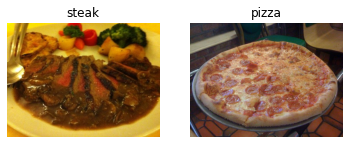

In [15]:
#breaking down binary classification 
plt.figure()
plt.subplot(1,2,1)
steak_img=random_img("pizza_steak/train/","steak")
plt.subplot(1,2,2)
steak_img=random_img("pizza_steak/train/","pizza")


#preprocessing data 

In [16]:
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"
# a batch is a small subset of data . 

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen =ImageDataGenerator(rescale=1/255.)
test_datagen =ImageDataGenerator(rescale=1/255.)

In [18]:
#Loading data and turn them to bathces 
train_data=train_datagen.flow_from_directory(directory=train_dir,target_size=(224,224),class_mode="binary",batch_size=32)
test_data=test_datagen.flow_from_directory(directory=test_dir,target_size=(224,224),class_mode="binary",batch_size=32)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [19]:
images,labels=train_data.next()
len(images),len(labels),len(train_data)


(32, 32, 47)

In [49]:
#create a model
tf.random.set_seed(42)
model4=tf.keras.Sequential([
tf.keras.layers.Conv2D(filters=10,kernel_size=3,strides=1,padding="valid",activation="relu",input_shape=(224,224,3))  ,    #input layrs   , if "same", output shape is same as input shape, if "valid", output shape gets compressed             
# stride :the size of the step the sliding window takes across an input 
tf.keras.layers.Conv2D(10,3,activation="relu"),
tf.keras.layers.Conv2D(10,3,activation="relu"),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1,activation="sigmoid")#output layers (for 1 out put , because we have binary classification)
])
model4.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history4=model4.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))
# here our train_data is combination of x and y so we pass it one time 

Epoch 1/5
47/47 [==============================] - 18s 370ms/step - loss: 0.7302 - accuracy: 0.6993 - val_loss: 0.4477 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 18s 395ms/step - loss: 0.4627 - accuracy: 0.7893 - val_loss: 0.4128 - val_accuracy: 0.8213
Epoch 3/5
47/47 [==============================] - 25s 532ms/step - loss: 0.3873 - accuracy: 0.8347 - val_loss: 0.3573 - val_accuracy: 0.8733
Epoch 4/5
47/47 [==============================] - 17s 360ms/step - loss: 0.3067 - accuracy: 0.8887 - val_loss: 0.2552 - val_accuracy: 0.9020
Epoch 5/5
47/47 [==============================] - 17s 360ms/step - loss: 0.2134 - accuracy: 0.9247 - val_loss: 0.1810 - val_accuracy: 0.9553


In [34]:
model4.evaluate(test_data)
model4.summary()

16/16 [==============================] - 3s 178ms/step - loss: 0.4101 - accuracy: 0.8060
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 222, 222, 13)      364       
                                                                 
 conv2d_20 (Conv2D)          (None, 220, 220, 10)      1180      
                                                                 
 conv2d_21 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_6 (Flatten)         (None, 475240)            0         
                                                                 
 dense_11 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,695
Trainable params: 477,695
Non-trainable params: 0
_________________________

In [32]:
model1.evaluate(test_data)

16/16 [==============================] - 3s 164ms/step - loss: 0.3378 - accuracy: 0.8460


[0.33781224489212036, 0.8460000157356262]

### evaluate model


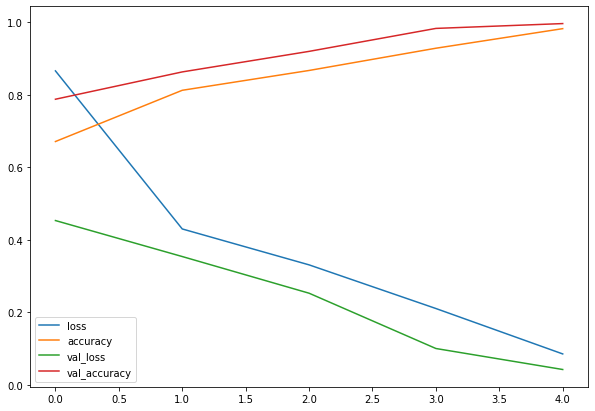

In [35]:
import pandas as pd
#plot the loss curves
pd.DataFrame(history4.history).plot(figsize=(10,7))

In [41]:
def plot_loss_curvse(history):
  loss=history.history["loss"]
  val_loss=history.history["val_loss"]
  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]
  epochs=range(len(history.history["loss"]))
  #plot loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_valss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()
  # plot accuracy 
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

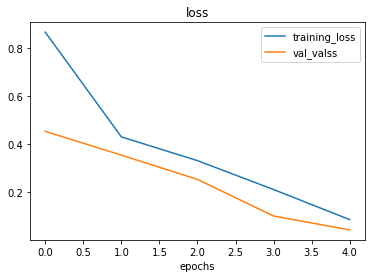

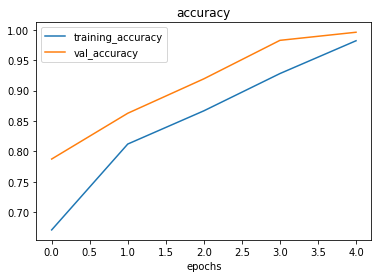

In [43]:
plot_loss_curvse(history4)

**very important note :** when our validation_loss is not decreasing ( or starts to increase ) our model is **overfitting** 

In [45]:
# create new model
model5=tf.keras.Sequential([
tf.keras.layers.Conv2D(10,3,activation="relu",input_shape=(224,224,3))                            ,
tf.keras.layers.MaxPool2D(pool_size=2),
tf.keras.layers.Conv2D(10,3,activation="relu"),
tf.keras.layers.MaxPool2D(),
tf.keras.layers.Conv2D(10,3,activation="relu"),
tf.keras.layers.MaxPool2D(),# maxpool finds the most important  parts of featuers of our image
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1,activation="sigmoid")

])

In [50]:
model5.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history5=model5.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 16s 339ms/step - loss: 0.3558 - accuracy: 0.8447 - val_loss: 0.3267 - val_accuracy: 0.8660
Epoch 2/5
47/47 [==============================] - 16s 344ms/step - loss: 0.3387 - accuracy: 0.8580 - val_loss: 0.3708 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 16s 341ms/step - loss: 0.3109 - accuracy: 0.8740 - val_loss: 0.3072 - val_accuracy: 0.8840
Epoch 4/5
47/47 [==============================] - 16s 343ms/step - loss: 0.3039 - accuracy: 0.8820 - val_loss: 0.2624 - val_accuracy: 0.8993
Epoch 5/5
47/47 [==============================] - 15s 328ms/step - loss: 0.2778 - accuracy: 0.8887 - val_loss: 0.2942 - val_accuracy: 0.8700


In [53]:
model5.evaluate(test_data)

16/16 [==============================] - 3s 202ms/step - loss: 0.2953 - accuracy: 0.8660


[0.2953421473503113, 0.8659999966621399]

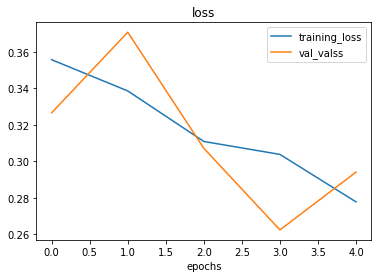

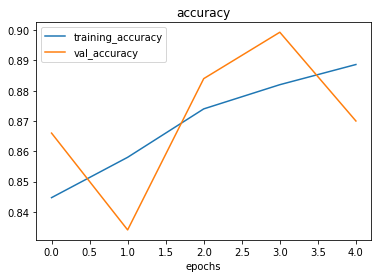

In [52]:
#polt the model5 lost curve
plot_loss_curvse(history5)